In [17]:
pip install konlpy

In [2]:
import re
import numpy as np
import pandas as pd
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image
import platform                
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': # 맥os
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':# 윈도우
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

In [ ]:
# mecab 다운

# konlpy & mecab install
import os
# install konlpy, jdk, JPype
!pip install konlpy
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!pip3 install JPype1-py3

# install mecab-ko
os.chdir('/tmp/')
!curl -LO https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
!tar zxfv mecab-0.996-ko-0.9.2.tar.gz
os.chdir('/tmp/mecab-0.996-ko-0.9.2')
!./configure
!make
!make check
!make install

# install mecab-ko-dic
!apt-get install automake
os.chdir('/tmp')
!curl -LO https://bitbucket.org/eunjeon/mecab-ko-dic/downloads/mecab-ko-dic-2.1.1-20180720.tar.gz
!tar -zxvf mecab-ko-dic-2.1.1-20180720.tar.gz
os.chdir('/tmp/mecab-ko-dic-2.1.1-20180720')
!./autogen.sh
!./configure
!make
!make install

# install mecab-python
os.chdir('/content')
!git clone https://bitbucket.org/eunjeon/mecab-python-0.996.git
os.chdir('/content/mecab-python-0.996')
!python3 setup.py build
!python3 setup.py install

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
cd /content/drive/MyDrive/project_ie/

/content/drive/MyDrive/project_ie


In [20]:
from textrank import KeywordSummarizer
from textrank import KeysentenceSummarizer

In [21]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

plt.rc('font', family=font_name)

fm._rebuild()

In [22]:
# 불용어 제거
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','요','대한','대해','안','회원','쪽','있습니다','글','생각','준비','업','독','취사','있을까요','조금','눈','네이버','또한','산업공학','선배님',
           '자','에','와','한','하다','그리고','넘','네','을','랑','예요','오','여서','사람','여러분','진짜','학년','관련','및','그냥','같습니다','리스트','부분','없습니다','저작권','등','정도','가야','부탁드립니다'
           ,'이에요','데','것','그','저','더','같아요','근데','듯','입니다','명','댓글','있는','이상','없는','다시','건','관리자','이야기','전','가요','이런','식','이후','산업','학과','공학','저작권','바로','대학','대학교',
           '에게','에서','라서','이라서','에요','와','만','나','로','이랑','내','엔','아','부터','수','안녕하세요','도움','현재','있어요','회원님','작성자와 스펙업카페','카페','학생들','모든','가장','진행','방법','시대','바로',
           '때','거','다','이다','이나','에도','것','고','게','인데','제','까지','에는','엔','이라','작성자','게시','고민','조언','비슷한','게시글','콘텐츠','스펙업','공학과','산업공학과','활용될 수','콘텐츠 및 게시글의 저작권','제작하는 콘텐츠',
           '콘텐츠 및','콘텐츠 및 게시글','무료','제작','도용','법적','무단','복제','경우','활용','학교','활동','사실','모두','분들','때문','가지','정말','시간','다른','위해','거의','매우','확인','통해','학생','내용',
          '약간','오늘','점','없이','자꾸','알','있','다니','또','어','딱','걍','더','중','니','저','면','듯','조언','비슷한','라면','어떤','본인','먼저','지금','시스템','분야','보고','다음','사람들','이유','자기',
           '서울대','고려대',
           '서울대학교','연세대','전남대','한양대','바보','클릭','고려대학교','연세대학교','과기대','아주대','연대','고대','아저씨','바보','선문대','경희대','시립대','성균관대','부산','건국대','존나','조선대','인하대','중앙대',
           '가천대','금오공대','두원공대','경북','어디가','항공대','의예','나중']

## 데이터 불러오기

In [8]:
jk = pd.read_csv('jk.csv')
cafe = pd.read_csv('cafe.csv')
orbi = pd.read_csv('orbi.csv')
blog = pd.read_csv('Naver_Blog.csv')
kin = pd.read_csv('Naver_Kin.csv')
dc = pd.read_csv('Dcinside.csv')
yt = pd.read_csv('Youtube.csv')
df = pd.read_csv('final_data.csv')

In [9]:
cj = cafe.append(jk)

In [ ]:
from konlpy.tag import Komoran
komoran = Komoran()
def komoran_tokenizer(sent):
    words = komoran.pos(sent, join=True)
    words = [w for w in words if ('/NN' in w or '/XR' in w or '/VA' in w or '/VV' in w)]
    return words

In [23]:
okt = Okt()
def Okt_tokenizer(sent):
    Oktonken = Okt()
    words = Oktonken.nouns(sent)
    words = [w for w in words if w not in stopwords and (len(w) > 1 )]
    return words

In [ ]:
from konlpy.tag import Mecab
tokenizer = Mecab()
def Mecab_tokenizer(sent):
    words = tokenizer.pos(sent, join=True)
    words = [w for w in words if ('NNG' in w or 'XR' in w or 'VA' in w or 'VV' in w)] # 명사, 어근, 형용사, 동사
    words = [w for w in words if w not in stopwords]
    return words

In [24]:
def tr_keyword(data, tokenizer):
  comment = data['content']
  comment = comment.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
  comment = comment.dropna()
  comment = comment.tolist()
  summarizer = KeywordSummarizer(tokenize=tokenizer, min_count=4, min_cooccurrence=1)
  keyword = summarizer.summarize(comment, topk=100)
  keyword = dict(keyword)
  wordcloud = WordCloud(width=1000, height=600, background_color="white", random_state=0, font_path=path)
  cloud = wordcloud.generate_from_frequencies(keyword)
  plt.figure(figsize=(15,10))
  plt.axis('off')
  plt.imshow(cloud)
  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


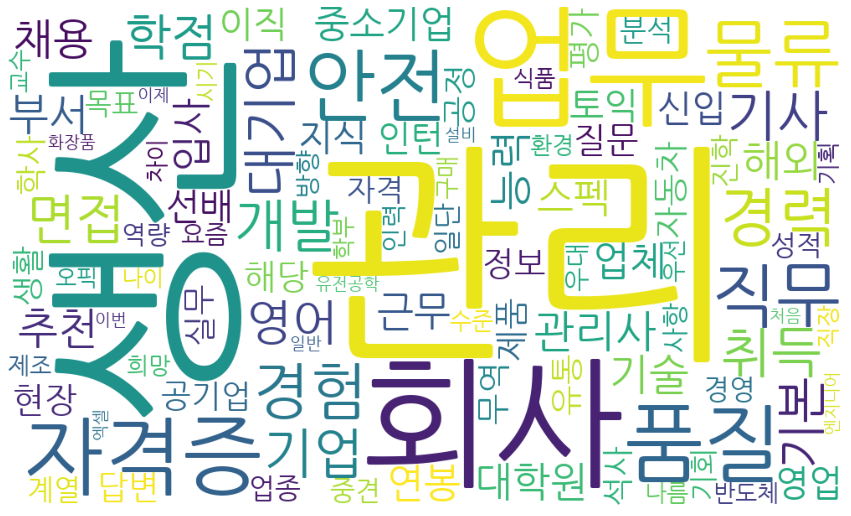

In [ ]:
tr_keyword(jk, Okt_tokenizer)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


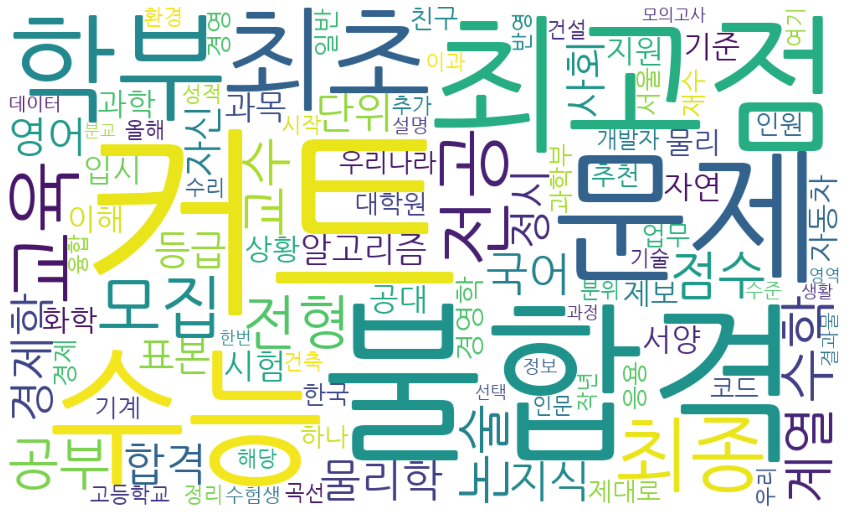

In [12]:
tr_keyword(orbi, Okt_tokenizer)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


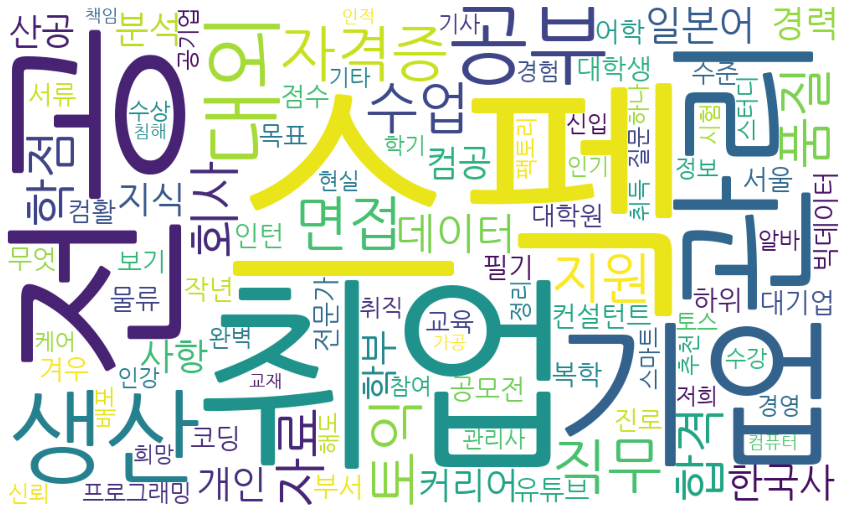

In [13]:
tr_keyword(cafe, Okt_tokenizer)

In [14]:
cj = jk.append(cafe)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


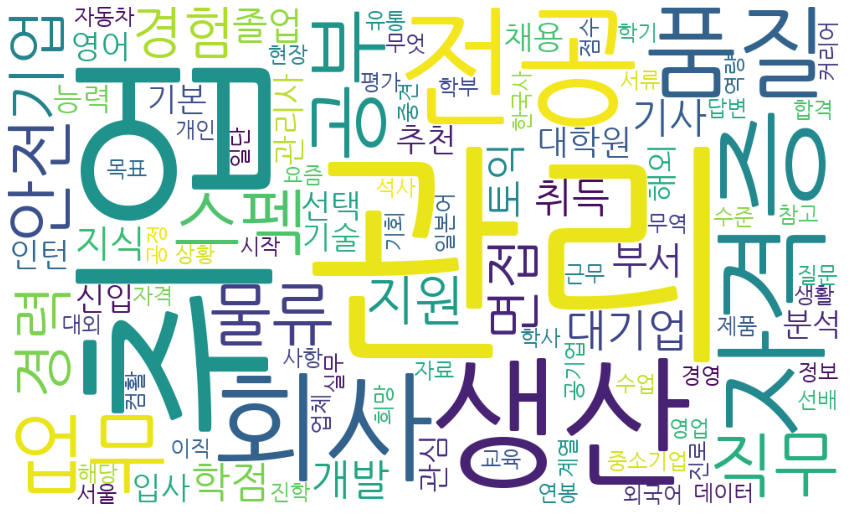

In [15]:
tr_keyword(cj, Okt_tokenizer)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


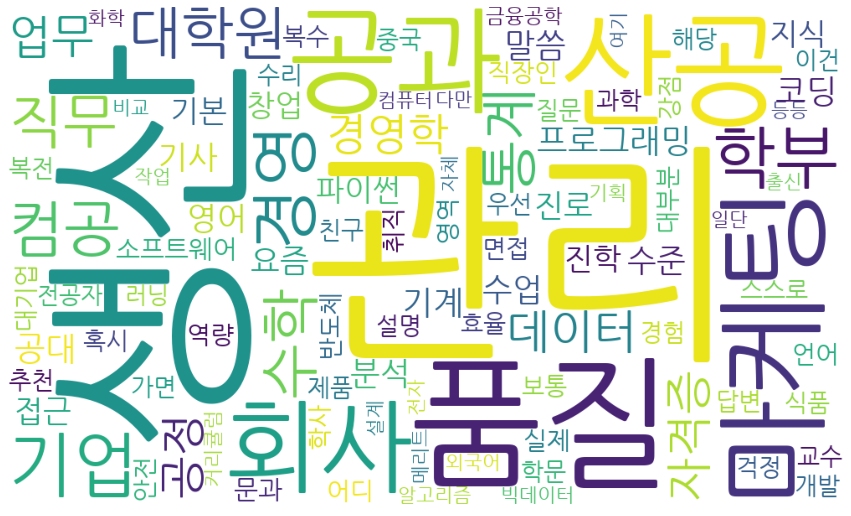

In [ ]:
tr_keyword(yt, Okt_tokenizer)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


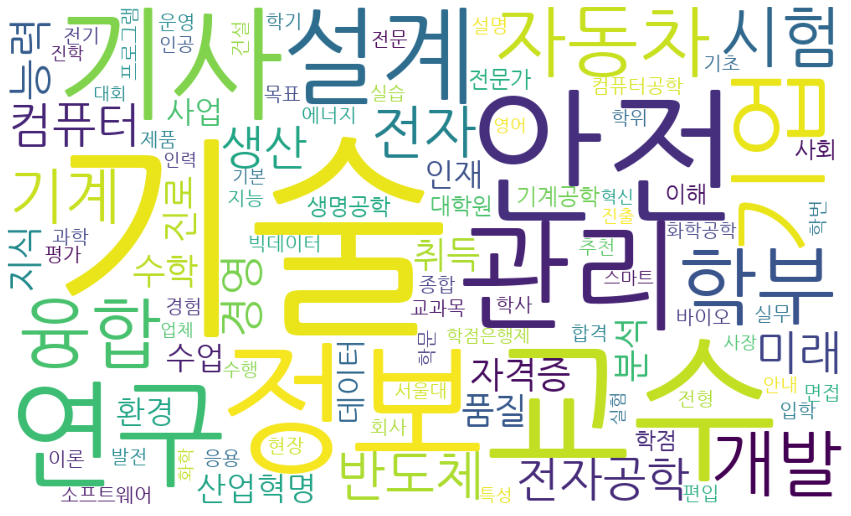

In [ ]:
tr_keyword(blog, Okt_tokenizer)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


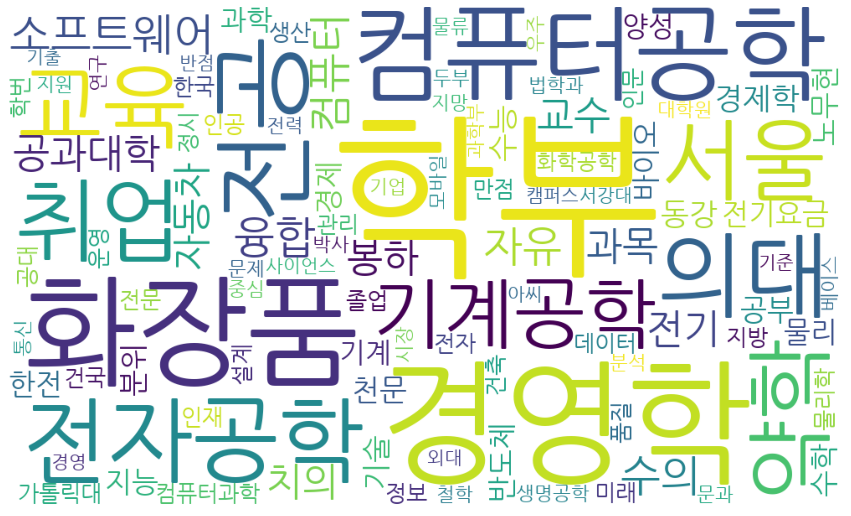

In [16]:
tr_keyword(dc, Okt_tokenizer)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


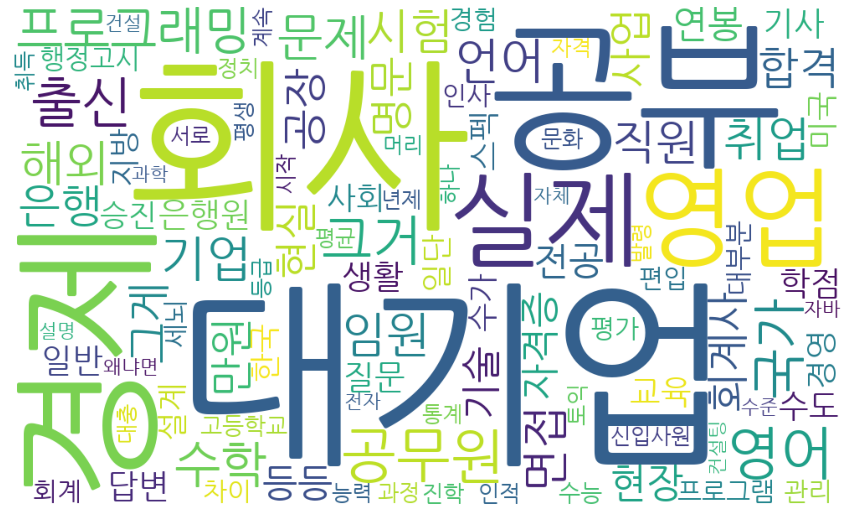

In [25]:
tr_keyword(kin, Okt_tokenizer)

In [26]:
df = pd.read_csv('final_data.csv')

In [28]:
# 불용어 제거
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','요','대한','대해','안','회원','쪽','있습니다','글','생각','준비','업','독','취사','있을까요','조금','눈','네이버','또한','공부','교육','대학','과정','학습','지원','문제',
           '자','에','와','한','하다','그리고','넘','네','을','랑','예요','오','여서','사람','여러분','진짜','학년','관련','및','그냥','같습니다','리스트','부분','없습니다','저작권','등','정도','가야','부탁드립니다','대학교','선택','과목','소개'
           ,'이에요','데','것','그','저','더','같아요','근데','듯','입니다','명','댓글','있는','이상','없는','다시','건','관리자','이야기','전','가요','이런','식','이후','산업','학과','공학','저작권','바로',
           '에게','에서','라서','이라서','에요','와','만','나','로','이랑','내','엔','아','부터','수','안녕하세요','도움','현재','있어요','회원님','작성자와 스펙업카페','카페','학생들','모든','가장','진행','방법','시대','바로',
           '때','거','다','이다','이나','에도','것','고','게','인데','제','까지','에는','엔','이라','작성자','게시','고민','조언','비슷한','게시글','콘텐츠','스펙업','공학과','산업공학과','활용될 수','콘텐츠 및 게시글의 저작권','제작하는 콘텐츠',
           '콘텐츠 및','콘텐츠 및 게시글','무료','제작','도용','법적','무단','복제','경우','활용','학교','활동','사실','모두','분들','때문','가지','정말','시간','다른','위해','거의','매우','확인','통해','학생','내용','상황','졸업','관심','참고','해결',
           '영상','계속','하나','제공','최근','사용','우리','한국','자신','기준','전공','양성','계획','이용','무엇','시작','교육','전공','공부','결과','졸업','산업공학','더 이상','광고정보 더보기초 후초 후','주소','취업',
          '약간','오늘','점','없이','자꾸','알','있','다니','또','어','딱','걍','더','중','니','저','면','듯','조언','비슷한','라면','어떤','본인','먼저','지금','시스템','분야','보고','다음','사람들','이유','자기',
           '서울대','고려대',
           '서울대학교','연세대','전남대','한양대','바보','클릭','고려대학교','연세대학교','과기대','아주대','연대','고대','아저씨','바보','선문대','경희대','시립대','성균관대','부산','건국대','존나','조선대','인하대','중앙대',
           '가천대','금오공대','두원공대','경북','어디가','항공대','의예','나중']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


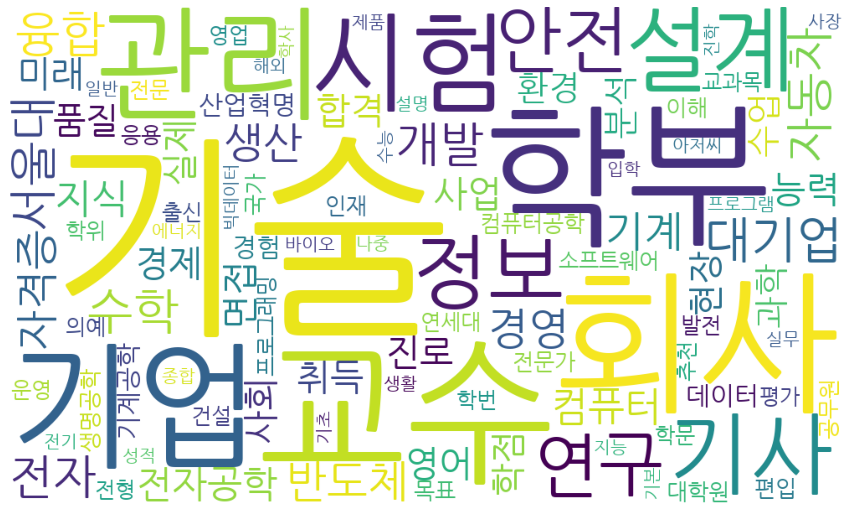

In [ ]:
tr_keyword(df, Okt_tokenizer)

In [29]:
df2019 = df [df['date'].between('2019-01-01', '2019-12-31')]
df2020 = df [df['date'].between('2020-01-01', '2020-12-31')]
df2021 = df [df['date'].between('2021-01-01', '2021-12-31')]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


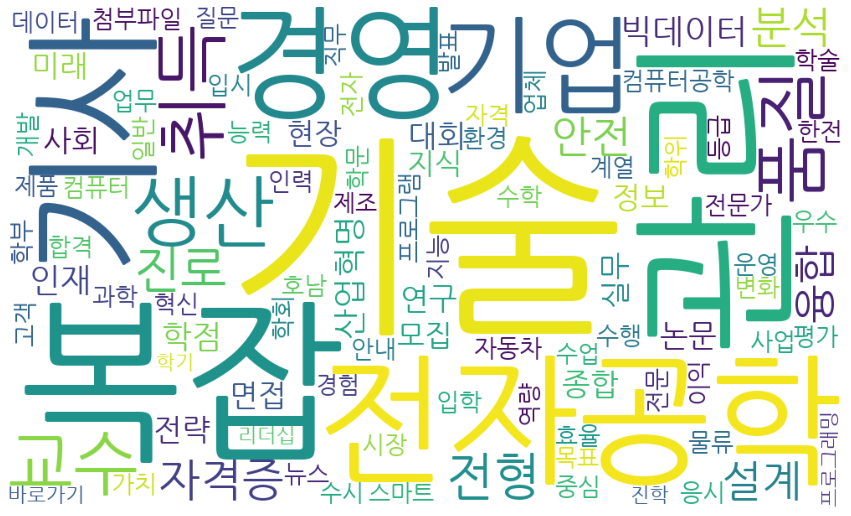

In [ ]:
tr_keyword(df2019, Okt_tokenizer)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


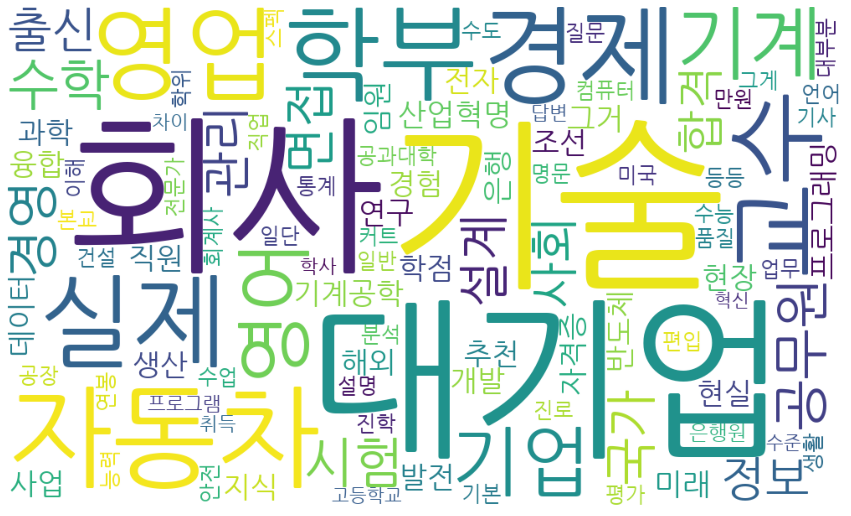

In [30]:
tr_keyword(df2020, Okt_tokenizer)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


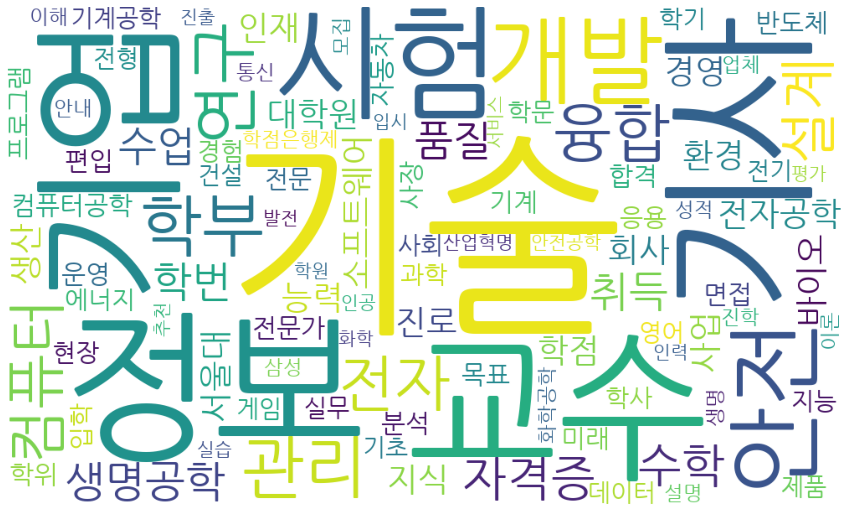

In [ ]:
tr_keyword(df2021, Okt_tokenizer)

In [ ]:
okt = Okt()
def Okt_tokenizer2(sent):
    Oktonken = Okt()
    words = Oktonken.morphs(sent)
    words = [w for w in words if w not in stopwords and (len(w) > 1 )]
    return words

In [ ]:
def tr_keysentence(data, tokenizer):
  comment = data['content']
  comment = comment.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
  comment = comment.tolist()
  summarizer = KeysentenceSummarizer(tokenize = tokenizer, min_sim = 0.3)
  keysents = summarizer.summarize(comment, topk=15)
  return keysents

In [ ]:
tr_keysentence(cafe, Okt_tokenizer2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


[(88,
  5.430757716042317,
  '안녕하세요인서울 중하위권 산업공학과 학년 끝내고 전역 년남은 현역 군인입니다 입시때 산공 지원할때는 경영컨설턴트 보고 지원했습니다 수시 면접때도 어떠한 문제점에 대해 분석하고 해결책을 제시해서 남들한테 발표하고 내 생각을 이야기하는 것을 좋아한다고 이런식으로 얘기해서 붙었습니다 실제로도 프리젠테이션 같은거 좋아하기도 하고요그런데 막상 찾아보니 컨설팅 회사는 외국계가 많고 인서울 중하위권으로는 어려우며 컨설턴트를 준비한다 해도 학부생 수준에서 어떠한 스펙을 준비해야할지 모르겠습니다그래서 현재 네이버 유튜브 카페 책 등등 많이 찾아보던 중에 쪽으로 가는게 제 적성에 맞다는 생각이 들었습니다 그런데 찾아보니 학부생으로 대학원은 갈 생각 아직은 없습니다 은 어렵다고 하는 것 같더군요 그래서 남들 많이 가는 뭐 생산관리 품질관리나  등으로 눈을 돌리고 있는데 그나마 눈을 끄는 것은 인것 같아요 물론 아직 얇디 얄팍한 지식이지만 아직 복학까지 년정도 남았으니 쪽부터 알아보고 준비해보려고 합니다 저처럼 산업공학과 전공 학부생이 쪽을 준비한 경우가 그냥 컴공을 준비한 학생들보다 쪽 지식이 훨씬 부족할 것이라고 예상됩니다 어떤 식으로 공부를 해 나가야 컴공과 학생들과는 다른 스펙을 만들 수 있을까요 산공 진로 중 한 부분이 데이터를 활용한 부분이라고 들었습니다 와 밀접한 관련이 있는 것 같은데 산업공학과 입장에서 비슷한 개념이라고 봐도 될까요 학년때 전공수업으로 를 배웠는데 인강보고 유튜브 보고 맨날 수업에서도 제일 늦게가며 조교들한테 질문해가며 겨우겨우 맞았습니다 이때 솔직히 코딩 재밌기는 한데 뭔가 내가 창의적인 아이디어가 부족하구나 이런 생각이 들었습니다 이런 제가 쪽을 준비해도 될까요 학교에서 연계전공으로 프로그래밍쪽을 신청할 수 있는 것으로 알고 있습니다 자세히 알아봐야 하는 부분이지만 그냥 제 개인적으로 자격증 준비하는 것처럼    파이썬 등을 공부하는 게 좋을까요 아니면 복학해서 본격적으로 학교 수업에서도 공부

In [ ]:
tr_keysentence(orbi, Okt_tokenizer2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


[(61,
  12.106860237714182,
  ' 서론올해 수능은 꽤나 어려울 것이고 만만한 과목이 하나도 없을 것입니다 수능처럼 될 것입니다이곳 오르비에서 찍기 특강이 성행하고 있지만 이것을 본 평가원은 가만히 있지 않겠죠 수학은 이나 일 것이고 국어든 영어든 과탐이든 지금까지 없던 답 개수를 만들어 낼 것입니다 그러니 찍기 분석이 안 통하게 낼 것입니다 그래야 제대로 된 실력을 알 수 있거든요국어  화작  언매   수능보다 더 어렵게수학  확통  기하  미적   작년 가형보다 더 어렵게 역대 수학 중 가장 어렵게영어  등급 비율 과학탐구물  컷  작년 물수능 복수 평보다 더 어려움화  컷  절평 깨짐생 컷 지  컷    본론가 수능 시스템 자체의 문제점지금은 수능이든 전반적인 고등학교 교육 시스템에 문제가 많습니다 수능 자체 시스템부터 얘기해 봅시다수능은 고인물화가 매우 심해져 있습니다 가장 큰 이유는 수능으로 메디컬 계열을 가려는 수생 때문입니다 물론 메디컬 계열을 꿈꾸시는 많은 오르비언 어려분들을 욕하려는 게 아닙니다 메디컬 계열 안정적이고 좋죠 하지만 저는 시스템 자체의 문제점을 얘기하려는 것입니다 메디컬 계열은 특유의 안정성 때문에 다른 계열과 입결 차이가 매우 많이 납니다 그리고 메디컬 계열을 노리는 수생이라면 이미 실력이 등급 이상인 경우가 많으니 그들이 수 반수를 할수록 고인물은 쌓여 갈 뿐입니다 실제로 작년 수능은 수생 비율이 였고 올해도 크게 다르지 않지만 올해는 작년과 다르게 약대가 새로 들어왔기 때문에 약대라는 새로운 메디컬 계열을 노리는 수생들이 많이 들어왔습니다 그 결과 작년보다 수생 표본은 더 올라갔습니다 따라서 이들을 변별하려면 지금보다도 수능이 더 어려워질 수밖에 없고 점점 더 시험도 이상해질 수밖에 없습니다 그리고 이것은 현재진형형이기도 합니다 수능이 원래 목적과 다르게 메디컬 고시가 되어 가는 것입니다이 문제를 해결하려면 메디컬 계열은 수능이 아니라 별도의 편입 시험으로 뽑거나 아예 외국처럼 학부가 아니라 전문대학원 

In [ ]:
tr_keysentence(jk, Okt_tokenizer2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


[(396,
  3.7383161587856746,
  '안녕하세요 이제 막 취준생활을 시작하는데 직무선택이 고민되어 글을 올리게 되었습니다살남 산업공학무역학 복수전공 수도권년제 학점 토익 오픽원산지관리사 유통관리사 관세품목분류경진대회 장려상 관세사차합격관세사시험 오래 준비하다가 이제 취업으로 갈아타기로 했습니다 원래는 해외영업쪽으로 취업하고 싶었지만 이 분야에 필수적인 영어를 제가 못하고 문과쪽은 영어회화도 잘하시는 분들이 많아 경쟁이 안될 것 같아 안전관리쪽으로 방향을 잡았습니다 급한대로 산업안전기사랑 위험물산업기사 취득해서 중소제조업체 안전관리자쪽을 희망했는데막상 잡코리아 채용공고 올라온거 보니 안전관리자는 경력직은 많이 뽑는데 신입은 거의 뽑지 않더라구요 이쪽이 경력이 쌓이면 점점 더 커리어를 개발해 나아갈 수 있고 또한 높은수준의 상위 기술자격증들도 존재하고이직도 수월해보이고 문과쪽 직무보다 연봉이 더 높은 것 같아 좋아보였는데뽑는인원이 너무 적어보여 이쪽으로 계속 나아가도 될 지 고민됩니다 ㅠㅠ질문 안전관리쪽 신입 채용이 진짜 빡센가요질문 건설안전쪽 계약직으로 근무한 뒤 제조업으로 이직이 가능할까요질문 선배님들이 보시기에 안전관리자라는 직업이 어떠신가요 연봉이라던지 업무관련 얘기라던지 썰좀 풀어주시면 감사하겠습니다답변해주시면 고맙겠습니다  '),
 (450,
  3.703288974111519,
  '졸업한지 년이 다 되어가는데 취업이 안되어 일단 작은 회사에 출근하기로 했습니다살 여자 어문상경 전공 학점 자격증은 컴활 급 매경테스트 우수 한국사 급 토익 교환학생 대외활동 행정실 근로 장학생 인턴 경험  그 외 알바  계약직 다수이렇게 있는데 문과 취업이 참 쉽지가 않더라고요 특히 제가 관심있는 산업군쪽은 거의 공학계열을 선호하시고요어찌 저찌 하다가 왕복 시간 거리 사원 명 매출액 억 업력 년 연봉  관심있는 산업군 인 회사에 정규직 총무사무 업무로 붙었습니다남초회사고 저를 제외하고는 거의 기술직입니다 그리고 계약서 비품관리 총무업무 문서관리 업무를

In [ ]:
tr_keysentence(blog, Okt_tokenizer2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


AssertionError: ignored

In [ ]:
tr_keysentence(yt, Okt_tokenizer2)

In [ ]:
tr_keysentence(dc, Okt_tokenizer2)

In [ ]:
tr_keysentence(kin, Okt_tokenizer2)